# Sonar
> Regresión

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score

import sys
from os.path import abspath

try:
    from src.gaparsimony import GAparsimony
    from src.population import Population
    from src.fitness import getFitness
except:
    sys.path.append(abspath("C:/Users/Millan/Desktop/GAparsimony"))
    from src.gaparsimony import GAparsimony
    from src.population import Population
    from src.fitness import getFitness

In [2]:
df = pd.read_csv("C:/Users/Millan/Desktop/TFM/sonar_csv.csv")
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
rerank_error = 0.001
params = {"C":{"range": (00.0001, 99.9999), "type": Population.FLOAT}, 
            "gamma":{"range": (0.00001,0.99999), "type": Population.FLOAT}, 
            "kernel": {"value": "poly", "type": Population.CONSTANT}}

In [4]:
def complexity(model, features):
    return np.sum(features)*1E6 + model.support_vectors_.shape[0]

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=123)

fitness = getFitness(SVC, cohen_kappa_score, complexity, cv, regresion=False, test_size=0.2, random_state=42, n_jobs=-1)

In [5]:
GAparsimony_model = GAparsimony(fitness=fitness,
                                  params=params,
                                  features=len(df.columns[:-1]),
                                  keep_history = True,
                                  rerank_error = rerank_error,
                                  popSize = 40,
                                  maxiter = 5, early_stop=10,
                                  feat_thres=0.90, # Perc selected features in first generation
                                  feat_mut_thres=0.10, # Prob of a feature to be one in mutation
                                  seed_ini = 1234)

In [6]:
GAparsimony_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

GA-PARSIMONY | iter = 0
  MeanVal = 0.5855564  |   ValBest = 0.662676  |  TstBest = 0.5714286  | ComplexBest = 52000083.0 | Time(min) = 0.4827912  

GA-PARSIMONY | iter = 1
  MeanVal = 0.6169929  |  ValBest = 0.6874457  |  TstBest = 0.6508314  | ComplexBest = 49000070.0 | Time(min) = 0.3774637  

GA-PARSIMONY | iter = 2
   MeanVal = 0.612246  |  ValBest = 0.6916426  |  TstBest = 0.5714286  | ComplexBest = 49000083.0 | Time(min) = 0.3592816  

GA-PARSIMONY | iter = 3
  MeanVal = 0.6431807  |  ValBest = 0.7077868  |  TstBest = 0.7563805  | ComplexBest = 43000072.0 |  Time(min) = 0.405081  

GA-PARSIMONY | iter = 4
   MeanVal = 0.677596  |  ValBest = 0.7504447  |  TstBest = 0.5809313  | ComplexBest = 41000077.0 | Time(min) = 0.3717556  



In [7]:
GAparsimony_model.summary()

+------------------------------------+
|             GA-PARSIMONY           |
+------------------------------------+

GA-PARSIMONY settings:
 Number of Parameters      = 2
 Number of Features        = 60
 Population size           = 40
 Maximum of generations    = 5
 Number of early-stop gen. = 10
 Elitism                   = 8
 Crossover probability     = 0.8
 Mutation probability      = 0.1
 Max diff(error) to ReRank = 0.001
 Perc. of 1s in first popu.= 0.9
 Prob. to be 1 in mutation = 0.1

 Search domain = 
                 C    gamma  col_0  col_1  col_2  col_3  col_4  col_5  col_6  \
Min_param   0.0001  0.00001    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Max_param  99.9999  0.99999    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

           col_7  col_8  col_9  col_10  col_11  col_12  col_13  col_14  \
Min_param    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
Max_param    1.0    1.0    1.0     1.0     1.0     1.0     1.0     1.0   

           col_15  c

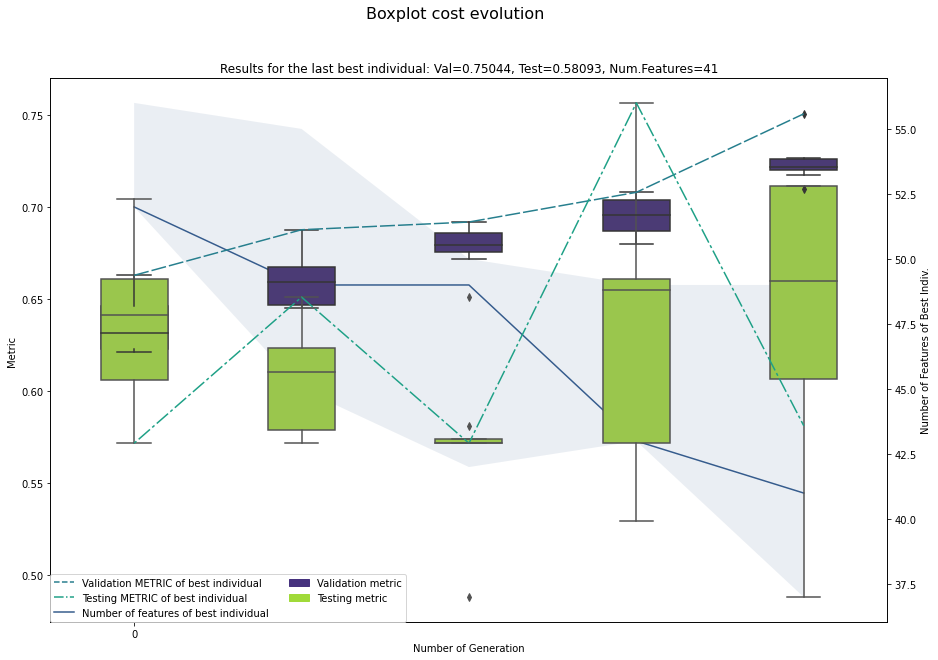

In [8]:
GAparsimony_model.plot(size_plot=(15,10))

### Compruebo que es el modelo correcto

In [9]:
GAparsimony_model.best_model

SVC(C=78.21856365999034, gamma=0.10924559985155109, kernel='poly')

In [17]:
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [18]:
result = GAparsimony_model.predict(X_test)

In [19]:
cohen_kappa_score(result, y_test)

0.580931263858093